# EXPLORATORY DATA ANALYSIS

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [279]:
df = pd.read_csv("Car+data.csv")

In [280]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [281]:
df.shape

(1000, 5)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [283]:
df.duplicated().sum()

0

In [284]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [285]:
del df['User ID']

In [286]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [287]:
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [288]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


In [289]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [290]:
df["Purchased"].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

<AxesSubplot: xlabel='AnnualSalary', ylabel='Count'>

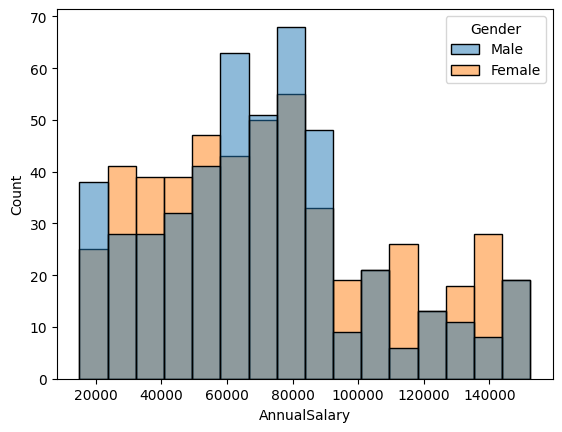

In [291]:
sns.histplot(x="AnnualSalary",data = df,hue = "Gender")

<AxesSubplot: xlabel='Age', ylabel='Count'>

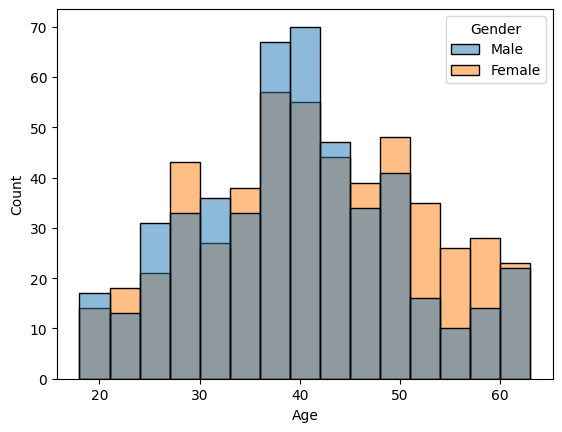

In [292]:
sns.histplot(x="Age",data = df,hue ="Gender")

<AxesSubplot: xlabel='AnnualSalary', ylabel='Count'>

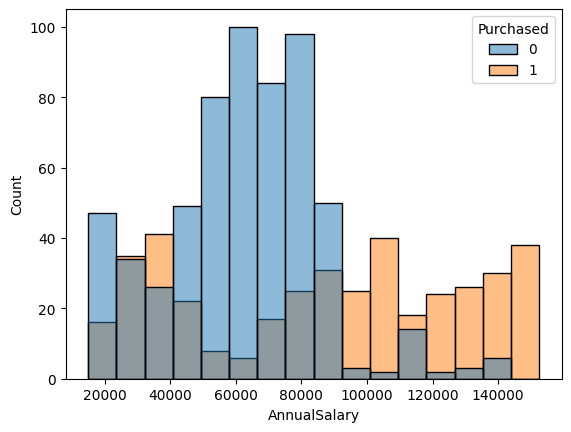

In [293]:
sns.histplot(x="AnnualSalary",data = df,hue ="Purchased")

<AxesSubplot: xlabel='Age', ylabel='Count'>

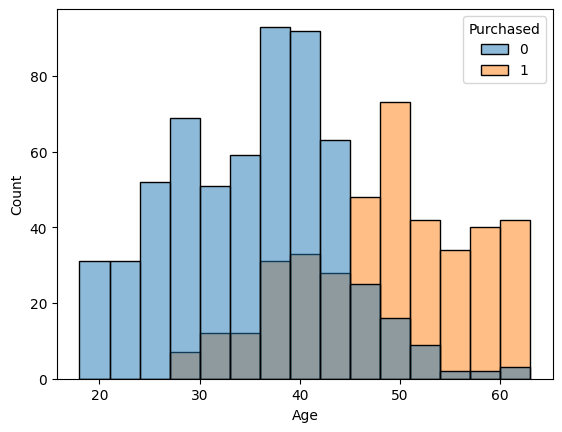

In [294]:
sns.histplot(x="Age",data = df,hue = "Purchased")

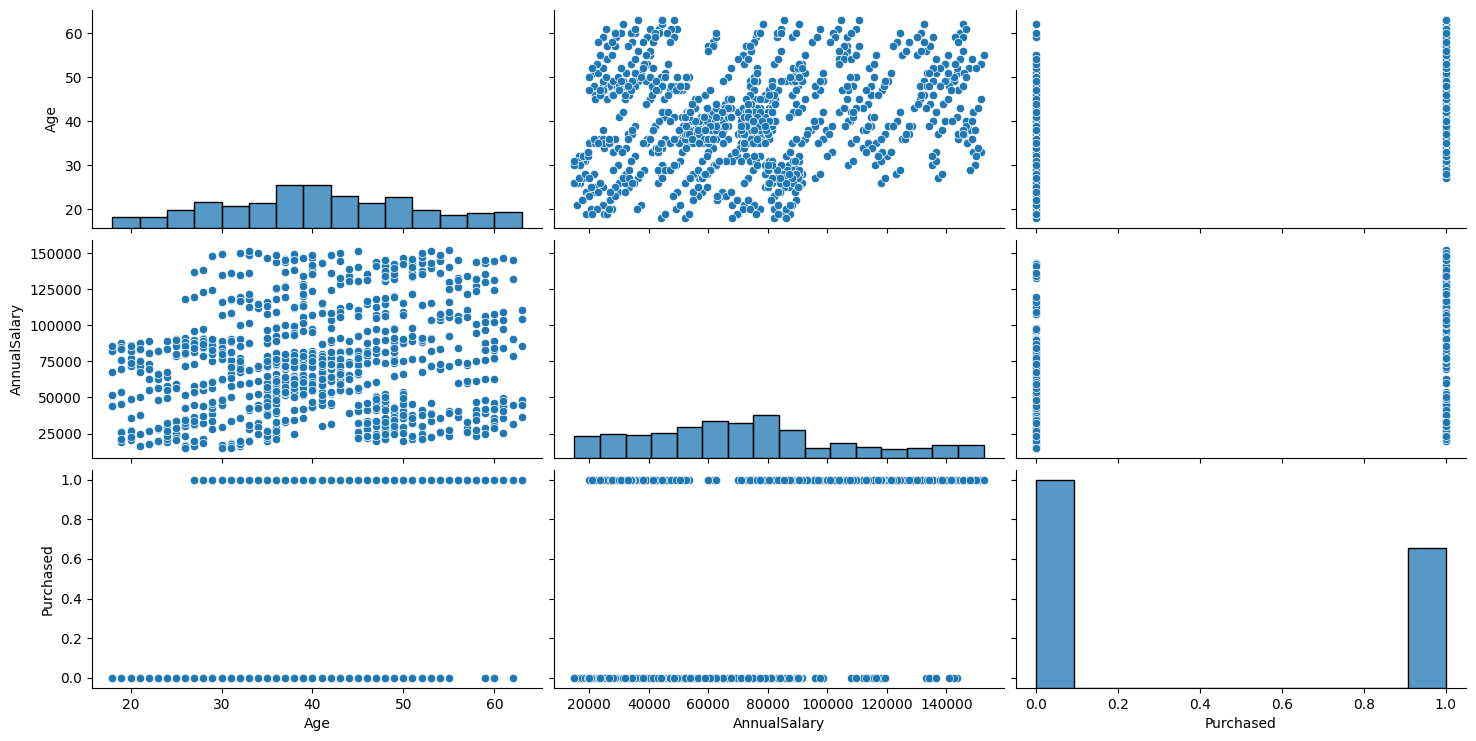

In [295]:
sns.pairplot(df,aspect=2)
plt.show()

In [296]:
df.corr()["Purchased"].sort_values()

C:\Users\HP\AppData\Local\Temp\ipykernel_16464\2678025668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Purchased"].sort_values()


AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

# FEATURE ENGINEERING 

In [297]:
df = pd.get_dummies(df,drop_first =False)

In [298]:
df.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,0,1
1,40,43500,0,0,1
2,49,74000,0,0,1
3,40,107500,1,0,1
4,25,79000,0,0,1


In [299]:
del df["Gender_Male"]

In [300]:
df.head()

,Age,AnnualSalary,Purchased,Gender_Female
0,35,20000,0,0
1,40,43500,0,0
2,49,74000,0,0
3,40,107500,1,0
4,25,79000,0,0


In [301]:
X = df[["AnnualSalary","Age","Gender_Female"]].copy()

In [302]:
y = df[["Purchased"]].copy()

In [303]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size =0.3,random_state =None)

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [305]:
from sklearn.metrics import accuracy_score

In [306]:
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test,predictions)))

# MACHINE LEARNING -1

In [307]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(scaled_X_train,y_train.values.ravel())
log_predictions = log_model.predict(scaled_X_test)
modelperformance(log_predictions)

Accuracy score in model is 0.8333333333333334


In [308]:
from sklearn.neighbors import KNeighborsClassifier
test_errors =[]
for k in range (1,30):
    knn_model = KNeighborsClassifier(n_neighbors =k)
    knn_model.fit(scaled_X_train,y_train.values.ravel())
    knn_pred = knn_model.predict(scaled_X_test)
    test_error_rate = 1- accuracy_score(y_test,knn_pred)
    test_errors.append(test_error_rate)
    

Text(0.5, 0, 'K Neighbors')

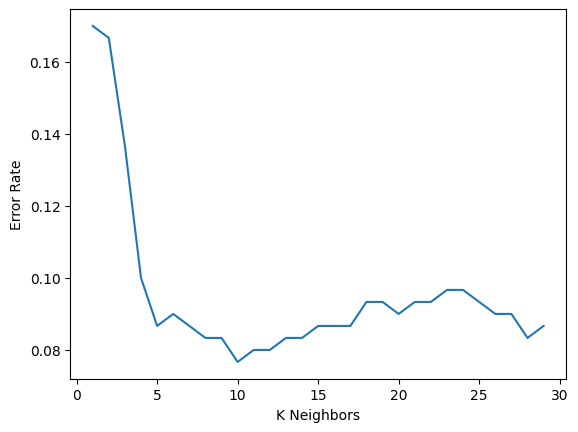

In [309]:
plt.plot(range(1,30),test_errors)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbors")

In [310]:
knn_elbowmethod =KNeighborsClassifier(n_neighbors = 12)
knn_elbowmethod.fit(scaled_X_train,y_train.values.ravel())
knn_pred = knn_model.predict(scaled_X_test)
modelperformance(knn_pred)


Accuracy score in model is 0.9133333333333333


In [311]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [('knn',knn)])
param_grid = {"knn__n_neighbors": k_values}
cv_classifier = GridSearchCV(pipe , param_grid,cv=5,scoring ="accuracy")


In [312]:
cv_classifier.fit(scaled_X_train,y_train.values.ravel())
print(cv_classifier.best_params_)


{'knn__n_neighbors': 11}


In [313]:
pred_gridknn = cv_classifier.predict(scaled_X_test)
modelperformance(pred_gridknn)

Accuracy score in model is 0.92


# MACHINE LEARNING -2

In [315]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr = {"C":[0.01,0.1,0.5,1],'kernel':["linear",'rbf','poly']}
gridsvr = GridSearchCV(svm , param_grid_svr)

In [316]:
gridsvr.fit(scaled_X_train,y_train.values.ravel())
pred_svr = gridsvr.predict(scaled_X_test)
modelperformance(pred_svr)

Accuracy score in model is 0.92


In [317]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(scaled_X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [318]:
treepred = treemodel.predict(scaled_X_test)
modelperformance(treepred)

Accuracy score in model is 0.83


In [320]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32,64,128,256]
max_features = [2,3,4]
bootstrap =[True,False]
oob_score =[True,False]
param_grid_rfr = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}
gridrfr = GridSearchCV(rfr_model,param_grid_rfr)
gridrfr.fit(scaled_X_train,y_train.values.ravel())

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 435, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [321]:
print(gridrfr.best_params_)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32, 'oob_score': False}


In [322]:
rfc = RandomForestClassifier(max_features=3,n_estimators=256,oob_score=True)

In [323]:
rfc.fit(scaled_X_train,y_train.values.ravel())
predsrfc = rfc.predict(scaled_X_test)
modelperformance(predsrfc)

Accuracy score in model is 0.86
